In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

<b> Load the data and make a datetime index.

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


1.<b>  Convert the date column to datetime dtype. <b>


In [3]:
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


2. <b> Set the date column as the index.

In [4]:
df.set_index("date", inplace=True)
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


3. <b> Filter out only the required data:
    
- Keep only data from the year 2000 or later.
- Keep only the following features:
    
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth

In [5]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,NaN
2020-12-28,0.20,1.10,-1.30,3.60,NaN
2020-12-29,0.00,2.60,1.10,4.10,NaN


4. <b> Impute any missing values

In [6]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

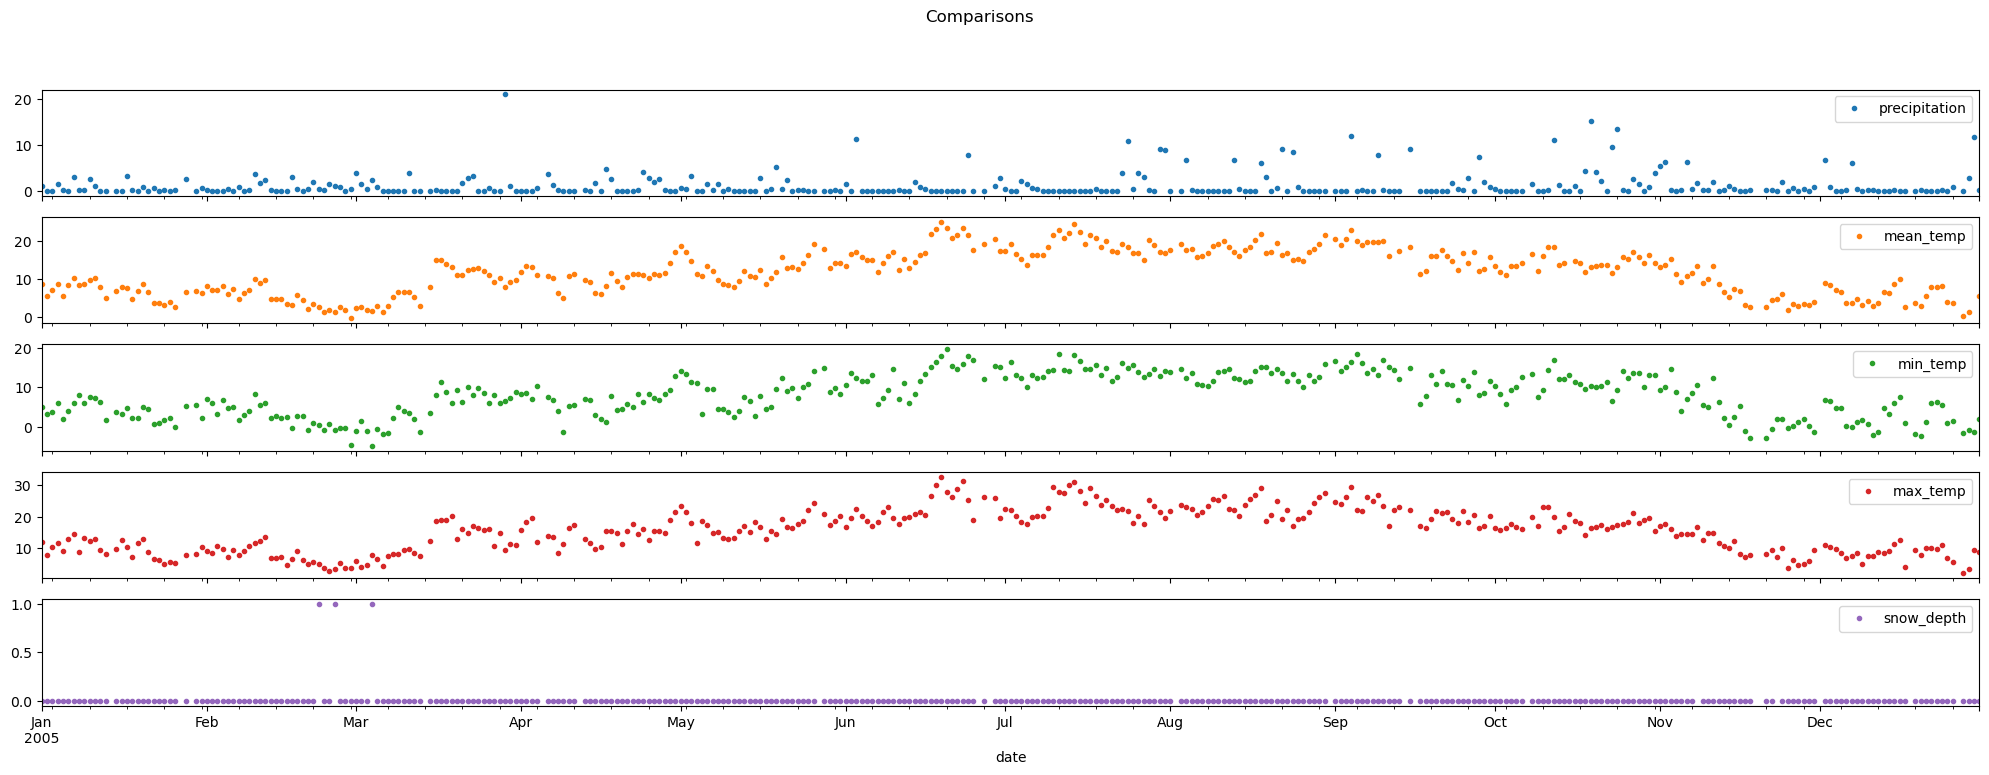

In [7]:
plt.rcParams['figure.figsize'] = (25, 8)
df.loc['2005'].plot(subplots=True, title='Comparisons', style='.');

In [8]:
df["precipitation"].fillna(method="bfill", inplace=True)
df["mean_temp"].interpolate(inplace=True)
df["min_temp"].interpolate(inplace=True)
df["max_temp"].interpolate(inplace=True)
df["snow_depth"].interpolate(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7671 non-null   float64
 1   mean_temp      7671 non-null   float64
 2   min_temp       7671 non-null   float64
 3   max_temp       7671 non-null   float64
 4   snow_depth     7671 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


<b> Answer the Questions with Visualizations (Using the Correct Frequency)

1. <b> What month had the most precipitation between 2000 through 2010?

In [10]:
# Resample the data as Monthly frequency.
month_df = df.copy().loc['2000':'2010'][["precipitation"]].resample("MS").mean()
month_df.head()

,precipitation
date,
2000-01-01,0.47
2000-02-01,2.32
2000-03-01,0.46
2000-04-01,3.03
2000-05-01,2.82


In [11]:
# Find the date and corresponding value for the max precipitation
max_precip = month_df["precipitation"].idxmax()
max_precip_id = month_df.loc[max_precip]
max_precip_id

precipitation   4.89
Name: 2009-11-01 00:00:00, dtype: float64

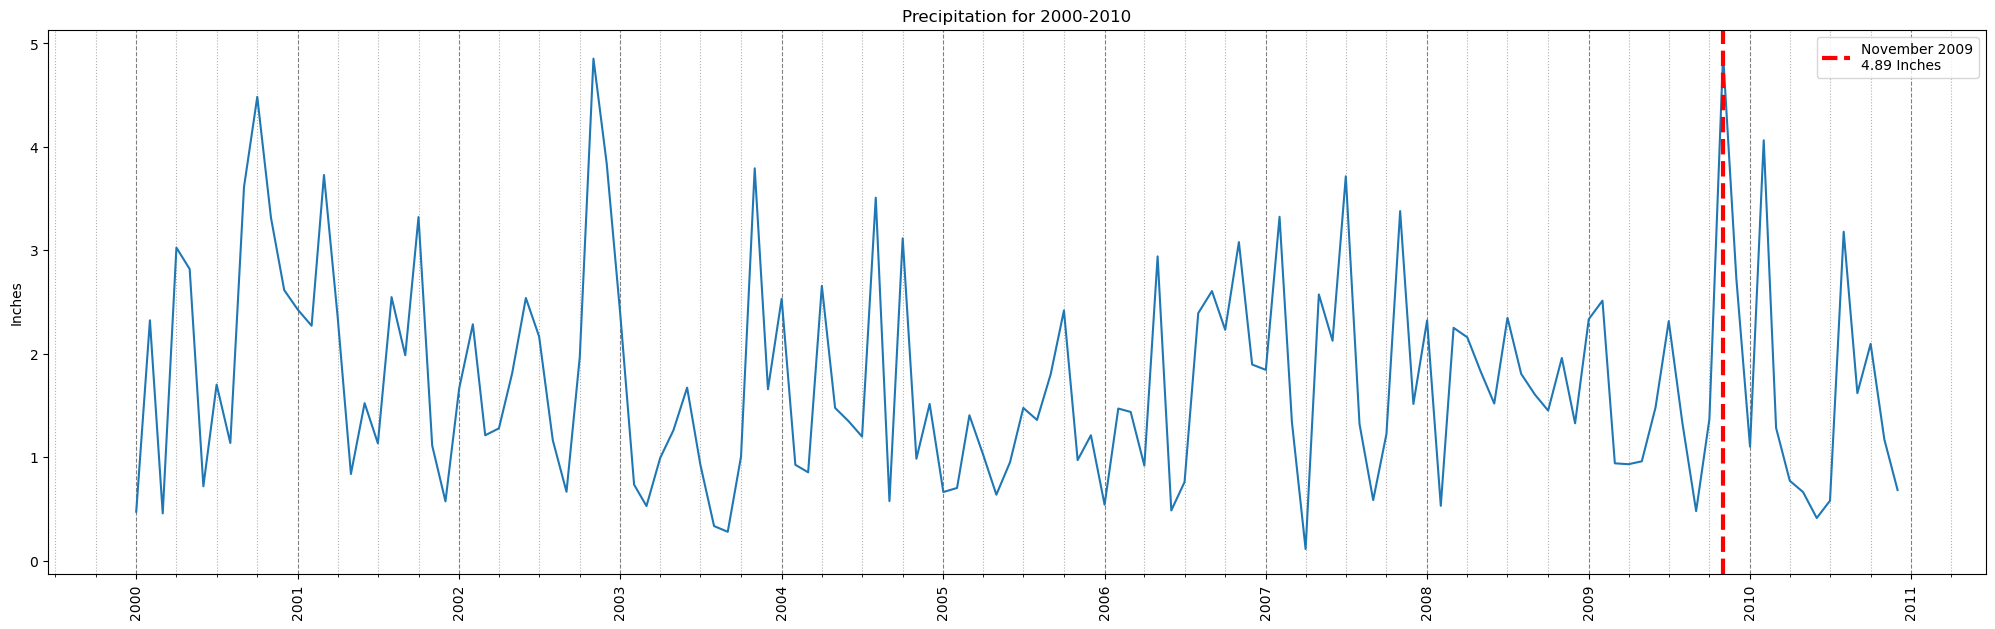

In [12]:
fig, ax = plt.subplots(figsize=(25, 8))

# Plotting and formatting
ax.plot(month_df.index, month_df.values)
ax.set_title("Precipitation for 2000-2010")
ax.set_ylabel("Inches")

# Major xaxis tick 
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Minor xaxis tick 
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]));

# Minor xaxis tick 
ax.grid(which='minor', axis='x', ls=":")

# Major xaxis tick
ax.grid(which='major',axis='x', ls="--", color='grey')

# Tick label rotation
fig.autofmt_xdate(rotation = 90, ha = 'center')

# Vertical line creation
ax.axvline(max_precip, 
           color="red",
           label=f"{max_precip.strftime('%B %Y')}\n{round(max_precip_id[0], 2)} Inches",
           ls="--",
           linewidth=3);
ax.legend();

2. <b> Which year between 2000-2020 had the coolest average temperature?

In [13]:
# Resample the data as Yearly frequency.
year_df = df.copy().loc["2000":"2020"][["mean_temp"]].resample("AS").mean()
year_df.head()

,mean_temp
date,
2000-01-01,11.58
2001-01-01,11.33
2002-01-01,12.08
2003-01-01,12.11
2004-01-01,11.90


In [14]:
# Find the date and corresponding value for coolest avg temp
cool_avg = year_df["mean_temp"].idxmin()
cool_avg_id = year_df.loc[cool_avg]
cool_avg_id

mean_temp   10.66
Name: 2010-01-01 00:00:00, dtype: float64

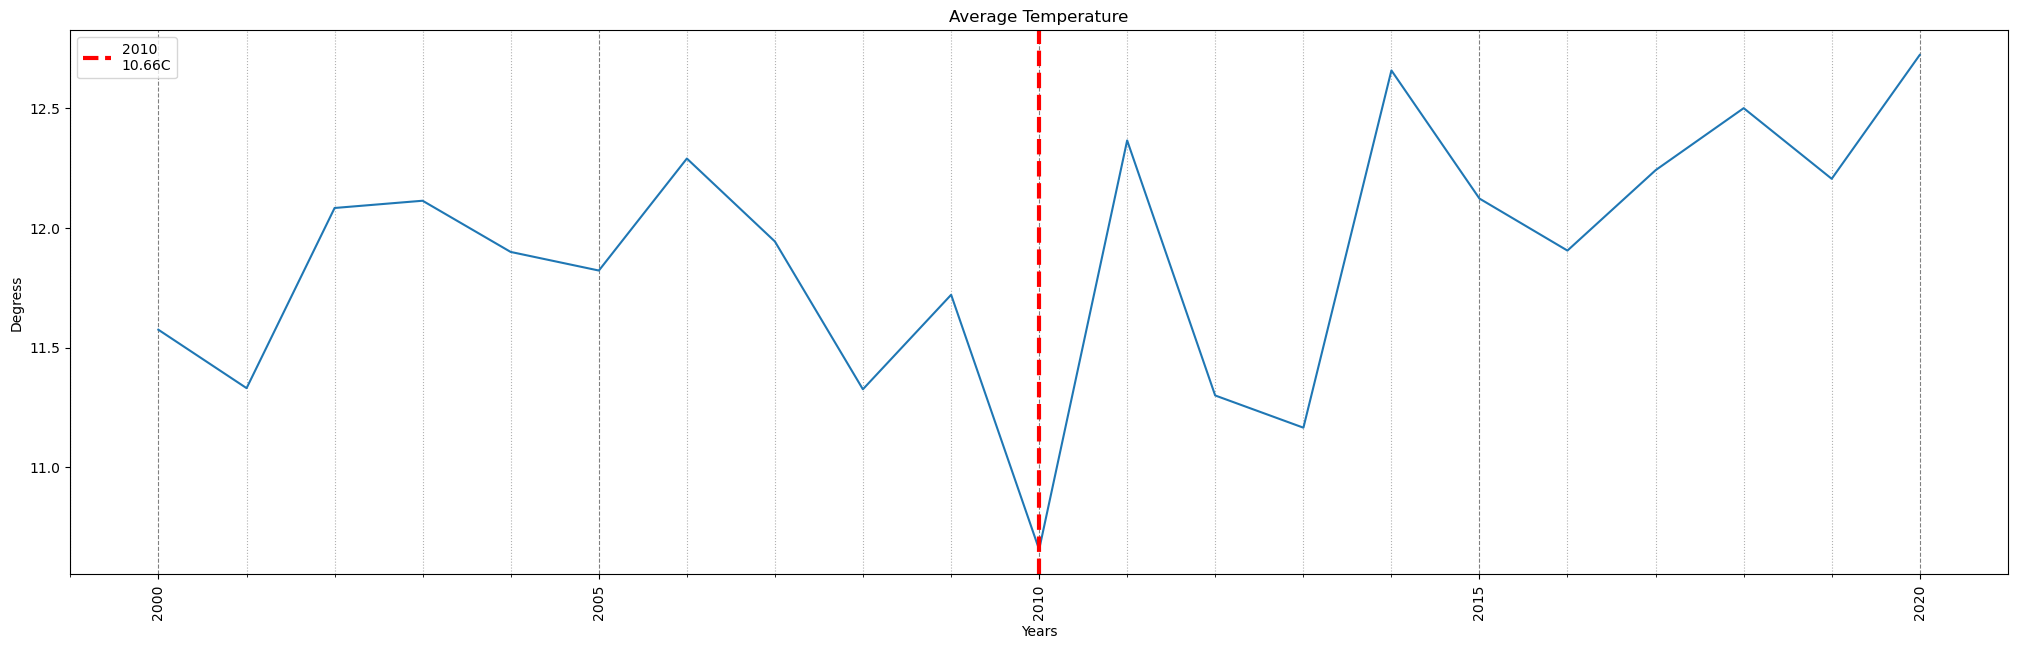

In [15]:
fig, ax = plt.subplots(figsize=(25, 8))

# Plotting and formatting
ax.plot(year_df.index, year_df.values)
ax.set_title("Average Temperature")
ax.set_xlabel("Years")
ax.set_ylabel("Degress")

# Major tick formatting
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Minor tick formatting
ax.xaxis.set_minor_locator(mdates.YearLocator());

# Minor xaxis ticks formatting
ax.grid(which='minor', axis='x', ls=":")

# Major xaxis ticks formatting
ax.grid(which='major',axis='x', ls="--", color='grey')


# Tick label rotation
fig.autofmt_xdate(rotation = 90, ha = 'center')

# Add a vertical line denoting the max precipitation
ax.axvline(cool_avg, 
           color="red",
           label=f"{cool_avg.strftime('%Y')}\n{round(cool_avg_id[0], 2)}C",
           ls="--",
           linewidth=3);
ax.legend();